<img src="images/Picture0.png" width=200x />

# Notebook 12 - SciPy Basics

## Instructions
Read the material below and complete the exercises.

Material covered in this notebook:

- How to import the scipy module
- how to use special functions in the SciPy module
- How to integrate and take numerical derivatives
- How to solve a simple ODE using SciPy

### Credits
Adapted from work of [J.R. Johansson](https://github.com/jrjohansson/scientific-python-lectures)

See https://scipy-cookbook.readthedocs.io for more applications of `SciPy` and examples.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction

`SciPy` in Python is an open-source library used for algorithms and solving many mathematical equations.
The `SciPy` framework builds on top of the low-level `NumPy` framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that `SciPy` covers are:

- Special functions (`scipy.special`)
- Integration (`scipy.integrate`)
- Optimization (`scipy.optimize`)
- Interpolation (`scipy.interpolate`)
- Fourier Transforms (`scipy.fftpack`)
- Signal Processing (`scipy.signal`)
- Linear Algebra (`scipy.linalg`)
- Sparse Eigenvalue Problems (`scipy.sparse`)
- Statistics (`scipy.stats`)
- Multi-dimensional image processing (`scipy.ndimage`)
- File IO (`scipy.io`)
Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this note we will look at how to solve a system of ordinary differential equations.
`SciPy` provides two different ways to solve ODEs: An API based on the function `odeint`, and object-oriented API based on the class `ode`. Usually `odeint` is easier to get started with, but the `ode` class offers some finer level of control.

Here we will use the `odeint` functions. For more information about the class `ode`, try `help(ode)`. It does pretty much the same thing as `odeint`, but in an object-oriented fashion.

To use `odeint`, first import it from the `scipy.integrate` module.

In [5]:
from scipy.integrate import odeint, ode

A system of ODEs are usually formulated on standard form before it is attacked numerically. Recall that the standard form is:

$y′=f(y,t)$

where

$y=[y1(t),y2(t),...,yn(t)]$

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Once we have defined the Python function `f` and array `y_0` (that is $f$
 and $y(0)$ in the mathematical formulation), we can use the `odeint` function as:

```
y_t = odeint(f, y_0, t)
```

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time.

We will see how we can implement `f` and `y_0` in Python code in the examples below.

**Example**: predator-prey equations.

Let's consider a two-species predator-prey equations, described in detail [here](https://en.wikipedia.org/wiki/Lotka–Volterra_equations):

> $dx/dt = \alpha x-\beta xy$ <br>
> $dy/dt = \delta xy -\gamma y$


In [6]:
alpha = 1.
beta = 0.1
delta = 0.07
gamma = 1.5

def derivative(X, t):
    """
    The right-hand side of the ODE
    """
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (delta * x - gamma)
    return np.array([dotx, doty])

In [7]:
# choose an initial state
X0 = np.array([10, 5]) # 10 preys (rabbits) and 5 predators (foxes)

In [8]:
# time coodinate to solve the ODE for
t = np.linspace(0, 15,  1000) 

The following code integrates the predator-prey equations (`derivative`) over the time step `t`.

In [9]:
# solve the ODE problem
X = odeint(derivative, X0, t)

In [10]:
prey, predator = X.T

We can now use `Matplotlib` to plot the evolution of both populations:

Text(0.5, 1.0, 'Evolution of prey and predator populations')

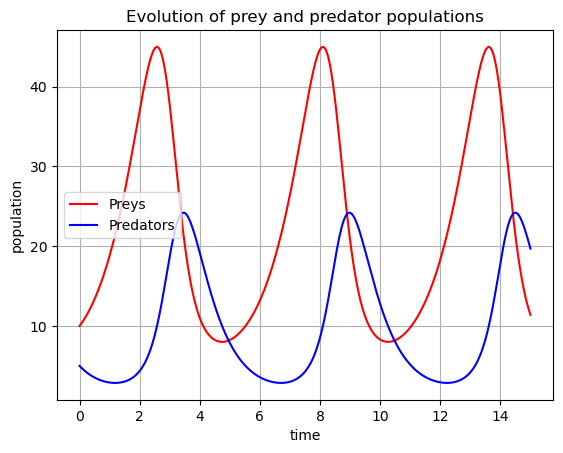

In [11]:
f1 = plt.figure()
plt.plot(t, prey, 'r-', label='Preys')
plt.plot(t, predator  , 'b-', label='Predators')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of prey and predator populations')